## Setting up with License

In [1]:
from quantrocket.license import set_license

In [2]:
set_license("59269a8b-dddc-11ee-abe0-1b045ed312e8")

{'licensekey': '5926........12e8', 'software_license': {}}

In [3]:
from quantrocket.master import list_calendar_statuses

In [4]:
list_calendar_statuses(exchanges="XNYS")

{'XNYS': {'status': 'closed',
  'since': '2024-03-08T16:00:00',
  'until': '2024-03-11T09:30:00',
  'timezone': 'America/New_York'}}

In [5]:
from quantrocket.master import list_calendar_statuses

In [6]:
!quantrocket master calendar 'XNYS' --in '1d'

XNYS:
  since: '2024-03-08T16:00:00'
  status: closed
  timezone: America/New_York
  until: '2024-03-11T09:30:00'


In [7]:
from quantrocket.codeload import clone
clone('hello-jupyter')

{'status': 'successfully cloned hello-jupyter',
 'files': {'added': ['Hello-Jupyter.ipynb']}}

## Creating Database

In [78]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", free=True)

{'status': 'successfully created quantrocket.v2.history.usstock-free-1d.sqlite'}

In [159]:
from quantrocket.history import get_db_config

In [160]:
get_db_config("usstock-free-1d")
{'vendor': 'usstock',
 'universe': 'FREE',
 'bar_size': '1 day',
 'shard': 'year',
 'fields': ['Symbol',
  'Open',
  'High',
  'Low',
  'Close',
  'Volume',
  'Vwap',
  'TotalTrades',
  'UnadjOpen',
  'UnadjHigh',
  'UnadjLow',
  'UnadjClose',
  'UnadjVolume',
  'UnadjVwap']}

{'vendor': 'usstock',
 'universe': 'FREE',
 'bar_size': '1 day',
 'shard': 'year',
 'fields': ['Symbol',
  'Open',
  'High',
  'Low',
  'Close',
  'Volume',
  'Vwap',
  'TotalTrades',
  'UnadjOpen',
  'UnadjHigh',
  'UnadjLow',
  'UnadjClose',
  'UnadjVolume',
  'UnadjVwap']}

In [162]:
from quantrocket.history import list_databases
list_databases()
['es-fut-1min',
'japan-stk-1d',
'uk-etf-15min',
'usstock-free-1d',
'usstock-1d']

['es-fut-1min',
 'japan-stk-1d',
 'uk-etf-15min',
 'usstock-free-1d',
 'usstock-1d']

In [163]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [164]:
from quantrocket.history import get_history_queue

In [165]:
get_history_queue()

{'edi': [],
 'sharadar': [],
 'usstock': [],
 'ibkr': {'priority': [], 'standard': []}}

## Creating Universe

In [169]:
from quantrocket.master import create_universe
create_universe("usstock-free", sids=securities.index.tolist())

{'code': 'usstock-free', 'provided': 8, 'inserted': 8, 'total_after_insert': 8}

In [231]:
securities = get_securities(symbols="AAPL", fields=["Symbol"])
securities

,Symbol
Sid,
FIBBG000B9XRY4,AAPL


In [233]:
create_universe("usstock-free-active", sids=securities.index.tolist())

{'code': 'usstock-free-active',
 'provided': 1,
 'inserted': 1,
 'total_after_insert': 1}

## Extracting the data of AAPL

In [472]:
from quantrocket.history import download_history_file
download_history_file("usstock-free-1d",
                          start_date="2023-01-01",end_date="2023-12-31",
                          fields=["Close"], universes=None, sids="FIBBG000B9XRY4",
                          filepath_or_buffer="usstock_free_1d.csv")
prices = pd.read_csv("usstock_free_1d.csv", parse_dates=["Date"])
prices.head()

,Sid,Date,Close
0,FIBBG000B9XRY4,2023-01-03,124.2163
1,FIBBG000B9XRY4,2023-01-04,125.4975
2,FIBBG000B9XRY4,2023-01-05,124.1666
3,FIBBG000B9XRY4,2023-01-06,128.7352
4,FIBBG000B9XRY4,2023-01-09,129.2616


## Finding returns

In [473]:
differences = []

for i in range(0,len(prices)):
    if i == 0:
        # For the first row, append None as there's no previous value
        differences.append(None)
    else:
        # Calculate the difference between current and previous values
        diff = (prices['Close'][i] - prices['Close'][i - 1]) / prices['Close'][i - 1]
        differences.append(diff)



# Add the differences list as a new column in the DataFrame
prices['returns_percent'] = differences

In [474]:
print(prices['returns_percent'])

0           NaN
1      0.010314
2     -0.010605
3      0.036794
4      0.004089
         ...   
245   -0.005547
246   -0.002841
247    0.000518
248    0.002226
249   -0.005424
Name: returns_percent, Length: 250, dtype: float64


In [475]:
print(prices)
first_column_name = 'Sid'
prices.rename(columns={prices.columns[0]: first_column_name}, inplace=True)
prices.to_csv("returns.csv")

                Sid       Date     Close  returns_percent
0    FIBBG000B9XRY4 2023-01-03  124.2163              NaN
1    FIBBG000B9XRY4 2023-01-04  125.4975         0.010314
2    FIBBG000B9XRY4 2023-01-05  124.1666        -0.010605
3    FIBBG000B9XRY4 2023-01-06  128.7352         0.036794
4    FIBBG000B9XRY4 2023-01-09  129.2616         0.004089
..              ...        ...       ...              ...
245  FIBBG000B9XRY4 2023-12-22  193.3533        -0.005547
246  FIBBG000B9XRY4 2023-12-26  192.8040        -0.002841
247  FIBBG000B9XRY4 2023-12-27  192.9038         0.000518
248  FIBBG000B9XRY4 2023-12-28  193.3333         0.002226
249  FIBBG000B9XRY4 2023-12-29  192.2846        -0.005424

[250 rows x 4 columns]


## Classification of states

In [476]:
state_num=[]
state=[]
for i in range(len(prices)):
    if(prices['returns_percent'][i]>=0.01):
        state_num.append(1)
        state.append('Bull')
    elif(prices['returns_percent'][i]>-0.01):
        state_num.append(0)
        state.append('Flat')
    else:
        state_num.append(-1)
        state.append('Bear')
prices['states_value']=state_num
prices['state']=state

In [477]:
print(prices['states_value'])
print(prices['state'])

0     -1
1      1
2     -1
3      1
4      0
      ..
245    0
246    0
247    0
248    0
249    0
Name: states_value, Length: 250, dtype: int64
0      Bear
1      Bull
2      Bear
3      Bull
4      Flat
       ... 
245    Flat
246    Flat
247    Flat
248    Flat
249    Flat
Name: state, Length: 250, dtype: object


In [478]:
prices.to_csv("state.csv")

## Finding Portfolio values

In [479]:
value=0
portfolio_value=[]
portfolio_value.append(value)
for i in range(len(prices)-1):
    if(prices['states_value'][i+1] == 1 and prices['states_value'][i] == 0):
        value=value+1
        portfolio_value.append(value)
    elif(prices['states_value'][i+1] == -1 and prices['states_value'][i] == 0):
        value=value-1
        portfolio_value.append(value)
    else:
        value=value
        portfolio_value.append(value)
print(portfolio_value)

[0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 7, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 17, 17, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17]


In [480]:
prices['portfolio_value']=portfolio_value
print(prices)

                Sid       Date     Close  returns_percent  states_value state  \
0    FIBBG000B9XRY4 2023-01-03  124.2163              NaN            -1  Bear   
1    FIBBG000B9XRY4 2023-01-04  125.4975         0.010314             1  Bull   
2    FIBBG000B9XRY4 2023-01-05  124.1666        -0.010605            -1  Bear   
3    FIBBG000B9XRY4 2023-01-06  128.7352         0.036794             1  Bull   
4    FIBBG000B9XRY4 2023-01-09  129.2616         0.004089             0  Flat   
..              ...        ...       ...              ...           ...   ...   
245  FIBBG000B9XRY4 2023-12-22  193.3533        -0.005547             0  Flat   
246  FIBBG000B9XRY4 2023-12-26  192.8040        -0.002841             0  Flat   
247  FIBBG000B9XRY4 2023-12-27  192.9038         0.000518             0  Flat   
248  FIBBG000B9XRY4 2023-12-28  193.3333         0.002226             0  Flat   
249  FIBBG000B9XRY4 2023-12-29  192.2846        -0.005424             0  Flat   

     portfolio_value  
0   

In [481]:
prices.to_csv("portfolio_values.csv")

## Calculating Transition Probability Matrix

In [482]:
import numpy as np

In [483]:
states = [-1, 0, 1]
num_states = len(states)

transition_matrix = np.zeros((num_states, num_states), dtype=int)
for i in range(len(prices) - 1):
    current_state_index = states.index(prices['states_value'][i])
    next_state_index = states.index(prices['states_value'][i + 1])
    transition_matrix[current_state_index][next_state_index] += 1

print("Transition Probability Matrix:")
print(transition_matrix)

Transition Probability Matrix:
[[ 5 26  5]
 [23 94 40]
 [ 7 38 11]]


In [484]:
row_sums = transition_matrix.sum(axis=1)

# Create a new matrix with values divided by their respective row sums
normalized_matrix = transition_matrix / row_sums[:, np.newaxis]

print("Original Transition Matrix:")
print(transition_matrix)
print("\nNormalized Transition Matrix:")
print(normalized_matrix)

Original Transition Matrix:
[[ 5 26  5]
 [23 94 40]
 [ 7 38 11]]

Normalized Transition Matrix:
[[0.13888889 0.72222222 0.13888889]
 [0.14649682 0.59872611 0.25477707]
 [0.125      0.67857143 0.19642857]]


## Maximizing value of V(N)

In [513]:
print("Maximized V(N) value:", portfolio_value[len(portfolio_value) - 1])
#print("Maximized V(N) value:", max(portfolio_value))

Maximized V(N) value: 17


## Finding Optimal buy indices

In [514]:
indices = []
for i in range(len(prices)-1):
    if(prices['states_value'][i+1] == 1 and prices['states_value'][i] == 0):
        indices.append(i)

In [515]:
print("Optimal buy indices")
print(indices)

Optimal buy indices
[5, 7, 11, 15, 20, 27, 29, 40, 49, 51, 58, 60, 68, 78, 84, 87, 93, 99, 102, 107, 109, 112, 116, 119, 122, 132, 141, 159, 163, 176, 186, 190, 206, 208, 211, 215, 217, 231, 233, 237]


## Visualization

In [491]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('portfolio_values.csv')

# Drop the unnamed column (if it exists)
df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

# Write the modified DataFrame back to a new CSV file
df.to_csv('final_table.csv', index=False)

In [492]:
data=pd.read_csv('final_table.csv')

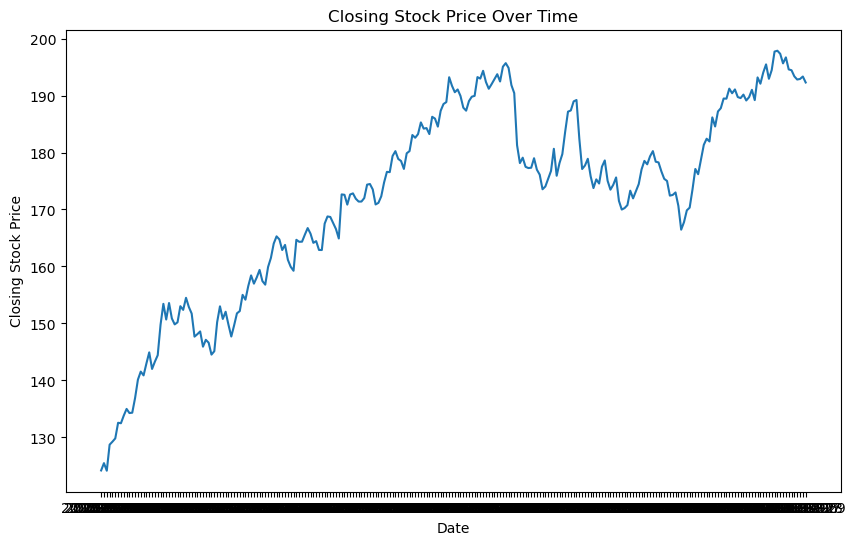

In [501]:
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

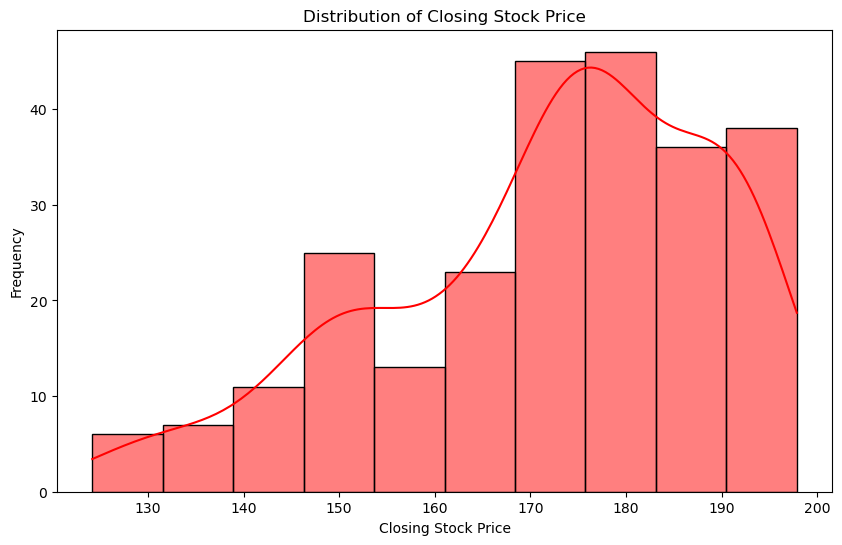

In [503]:
# Distribution of data
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True,color='red')
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

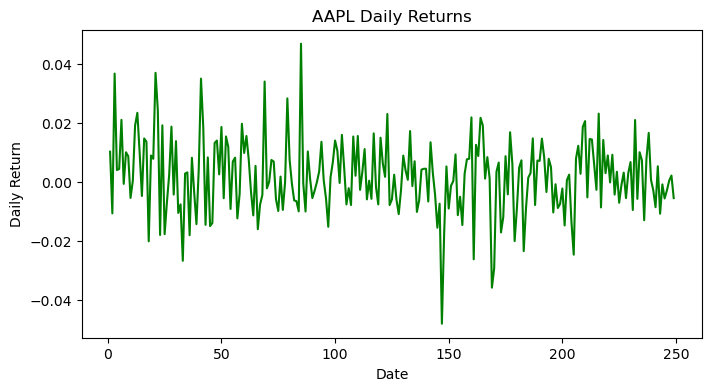

In [505]:
daily_returns = data['Close'].pct_change()

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values,color='green')
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

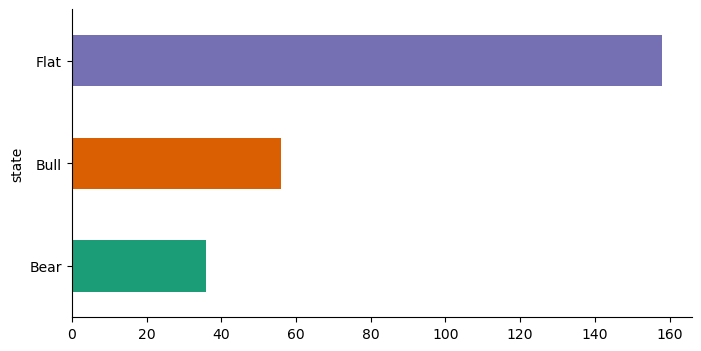

In [511]:
import seaborn as sns
data.groupby('state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Implementation of Autoregressive Integrated Moving Average (ARIMA)

## Loading the data

In [549]:
import pandas as pd

net_df = pd.read_csv("final_table.csv", index_col="Date", parse_dates=True)
net_df.head()

,Sid,Close,returns_percent,states_value,state,portfolio_value
Date,,,,,,
2023-01-03,FIBBG000B9XRY4,124.2163,NaN,-1,Bear,0
2023-01-04,FIBBG000B9XRY4,125.4975,0.010314,1,Bull,0
2023-01-05,FIBBG000B9XRY4,124.1666,-0.010605,-1,Bear,0
2023-01-06,FIBBG000B9XRY4,128.7352,0.036794,1,Bull,0
2023-01-09,FIBBG000B9XRY4,129.2616,0.004089,0,Flat,0


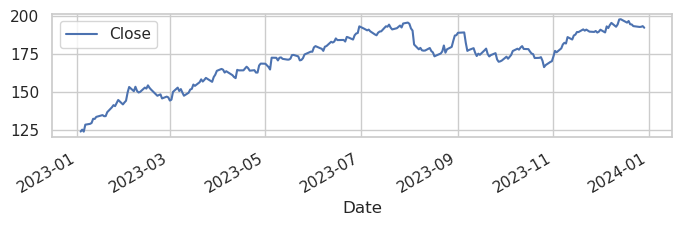

In [550]:
net_df[["Close"]].plot(subplots=True, layout=(2,1));

In [551]:
df_close = net_df['Close']

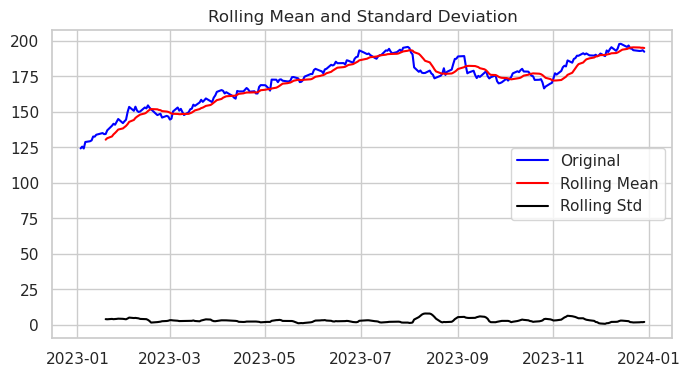

Results of dickey fuller test
Test Statistics                 -2.586133
p-value                          0.095897
No. of lags used                 0.000000
Number of observations used    249.000000
critical value (1%)             -3.456888
critical value (5%)             -2.873219
critical value (10%)            -2.572994
dtype: float64


In [552]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

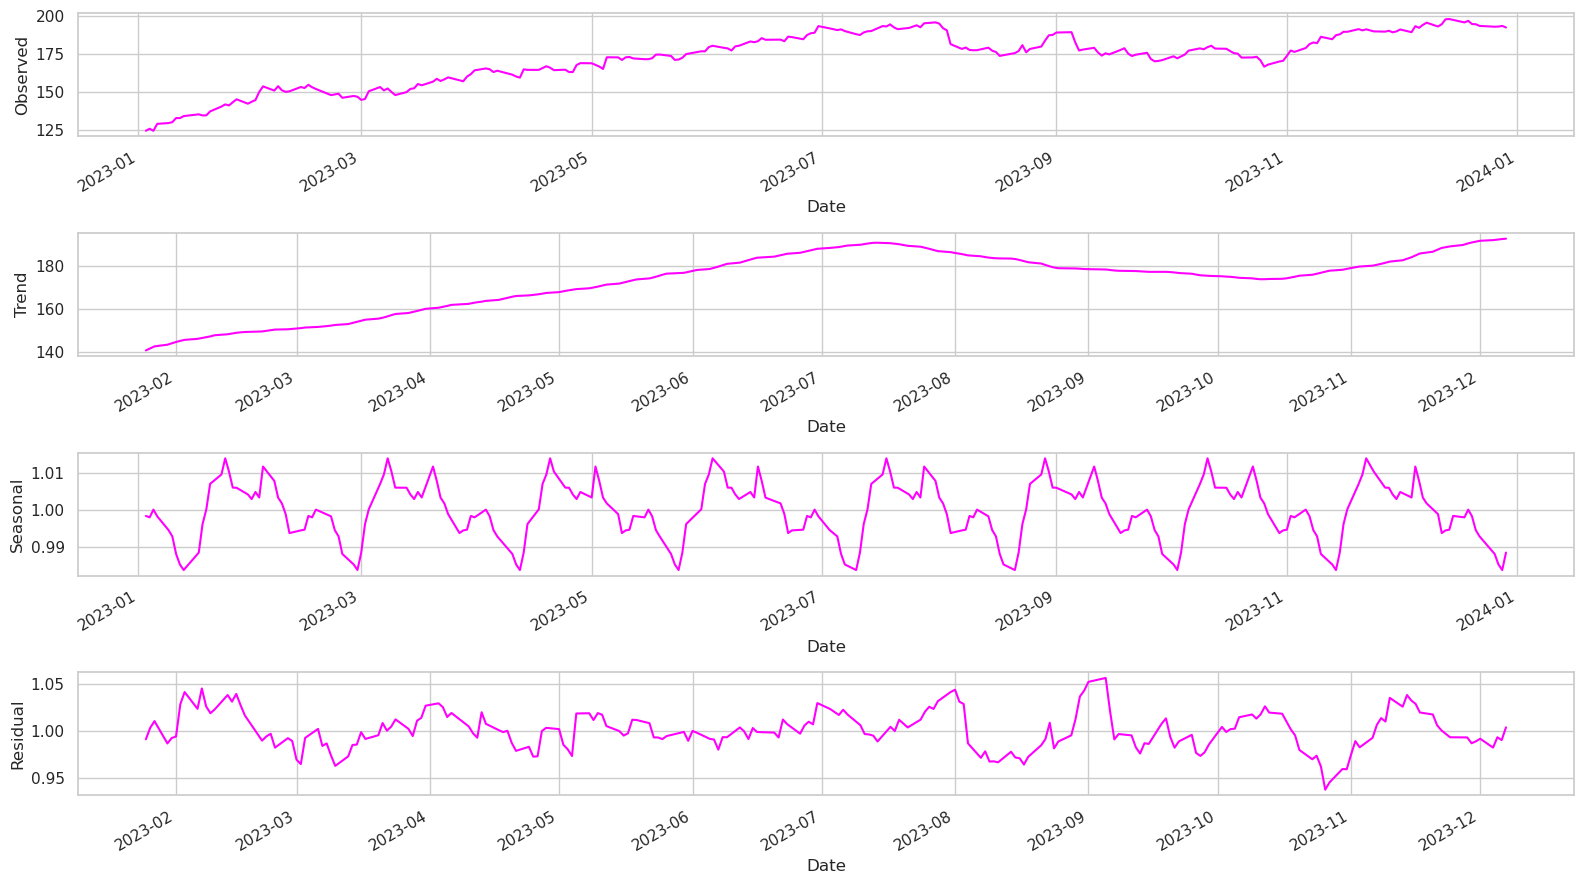

In [553]:
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 9))

result.observed.plot(ax=ax1, color='magenta')
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, color='magenta')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, color='magenta')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, color='magenta')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()


In [554]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = net_df[0:int(len(net_df)*0.9)], net_df[int(len(net_df)*0.9):]


train_arima = train_data['Close']
test_arima = test_data['Close']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

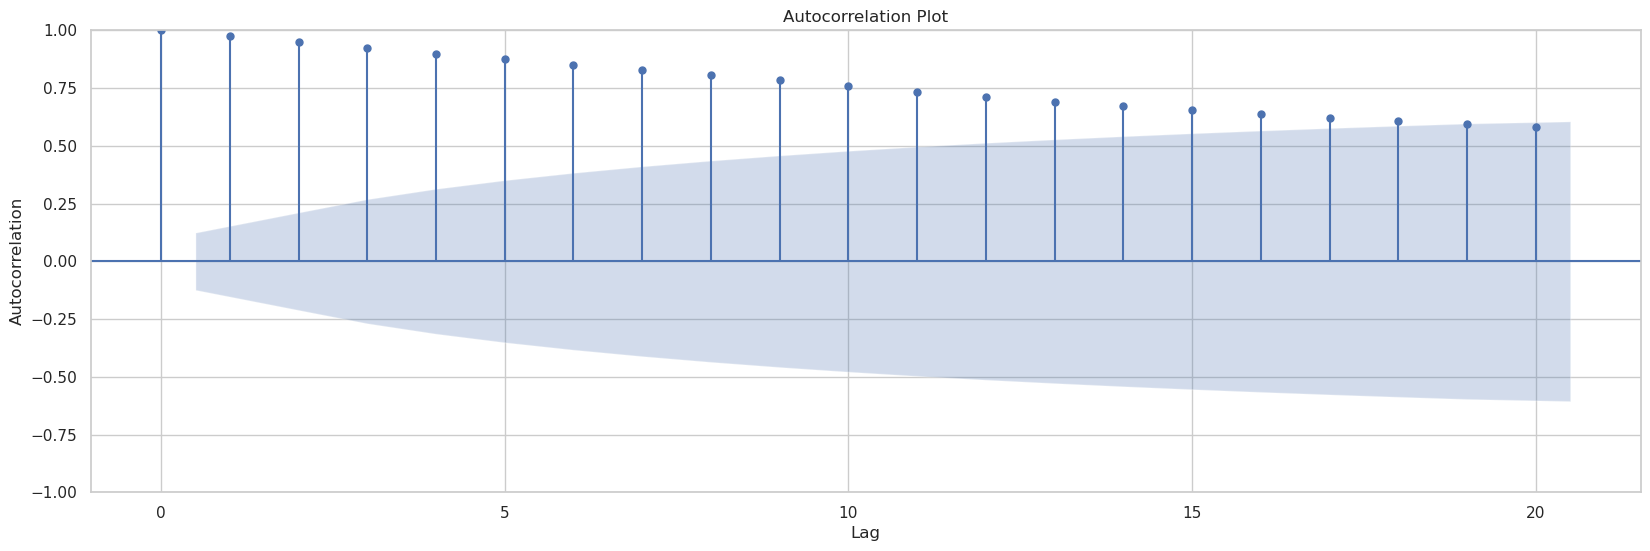

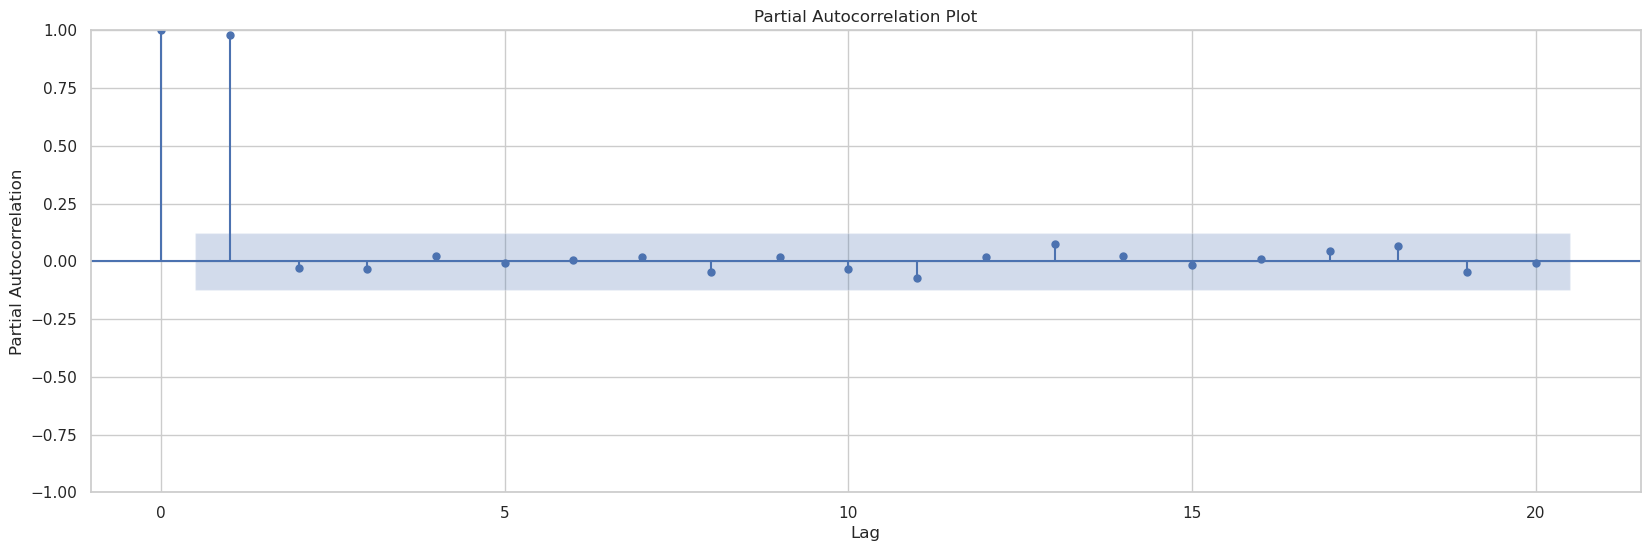

In [555]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set(style='whitegrid')

# Autocorrelation plot
fig, ax = plt.subplots(figsize=(20, 6))
plot_acf(df_close, lags=20, ax=ax)
ax.set_title('Autocorrelation Plot')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.show()

# Partial autocorrelation plot
fig, ax = plt.subplots(figsize=(20, 6))
plot_pacf(df_close, lags=20, ax=ax)
ax.set_title('Partial Autocorrelation Plot')
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
plt.show()

## Rolling Forecasts

In [556]:
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

## Model Evaluation

In [557]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 2.6453334173544123
MAE: 1.2920059064064957
RMSE: 1.6264480985738254


## Model Visualization

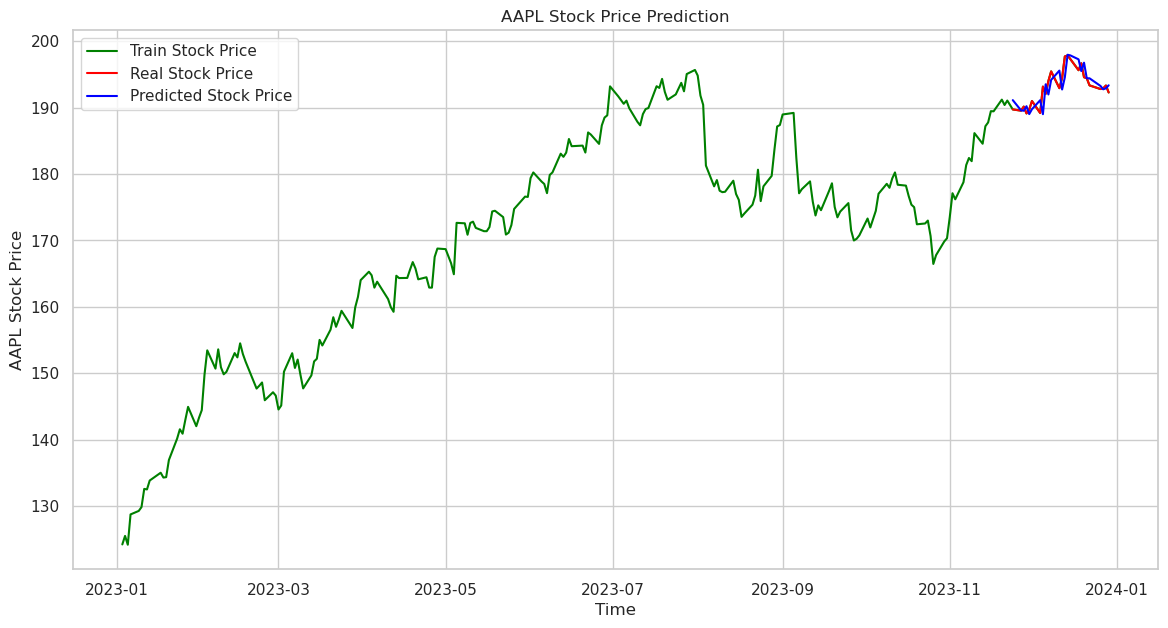

In [558]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(net_df.index[-600:], df_close.tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.grid(True)
plt.show()